# Twitter Sentiment Analysis

This is a sentiment analysis program that parses the tweets fetched from Twitter using Python


In [2]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [73]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [80]:
# Get the data
cols = ['Keys']
df = pd.read_csv("Login.csv")

# Twitter Api Credentials
consumerKey = df["Keys"][0]
consumerSecret = df["Keys"][1]
accessToken = df["Keys"][2]
accessTokenSecret = df["Keys"][3]

In [81]:
# Create the Authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [83]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) I tackle every big new problem by asking two questions: Who has dealt with this problem well? And what can we learn from them? @ExemplarsHealth will help to fill the gap in global health knowledge sharing and to accelerate progress in saving lives. https://t.co/5OhO10BVVP

2) Of all the things I’ve learned from Warren Buffett (and there have been a lot), the most important might be what friendship is all about. Here’s why he’s a person that I admire as well as like: https://t.co/XbZTIfO90b

3) Happy 90th birthday, Warren! https://t.co/8nH2EulTR4

4) .@AbeShinzo, thank you for making the world a healthier and more equitable place. Your understanding of how we can improve global prosperity, through support of organizations like @Gavi, has been truly inspiring. Please now go take care of your own health.

5) RT @UN: 6 months ago, Africa confirmed its first case of #COVID19. Since then, there have been 1 million cases, affecting every country on…



In [84]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,I tackle every big new problem by asking two q...
1,Of all the things I’ve learned from Warren Buf...
2,"Happy 90th birthday, Warren! https://t.co/8nH2..."
3,".@AbeShinzo, thank you for making the world a ..."
4,"RT @UN: 6 months ago, Africa confirmed its fir..."


In [85]:
# Clean the text
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #removes @ mentions
  text = re.sub(r'#','',text) # Removing the '#' symbol text
  text = re.sub('RT[\s]+', '', text) # Removing RT
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  return text

df["Tweets"] = df["Tweets"].apply(cleanTxt)
df

,Tweets
0,I tackle every big new problem by asking two q...
1,Of all the things I’ve learned from Warren Buf...
2,"Happy 90th birthday, Warren!"
3,"., thank you for making the world a healthier ..."
4,": 6 months ago, Africa confirmed its first cas..."
...,...
95,There are few people I’ve learned more from ov...
96,I’ve been impressed by governors across the co...
97,Thanks to Norway and Prime Minister _solberg f...
98,The international response will require fundin...


In [86]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,I tackle every big new problem by asking two q...,0.184848,0.045455
1,Of all the things I’ve learned from Warren Buf...,0.750000,0.450000
2,"Happy 90th birthday, Warren!",1.000000,1.000000
3,"., thank you for making the world a healthier ...",0.625000,0.400000
4,": 6 months ago, Africa confirmed its first cas...",0.666667,0.325000
...,...,...,...
95,There are few people I’ve learned more from ov...,0.533333,0.433333
96,I’ve been impressed by governors across the co...,0.750000,0.750000
97,Thanks to Norway and Prime Minister _solberg f...,0.400000,0.200000
98,The international response will require fundin...,0.200000,0.100000


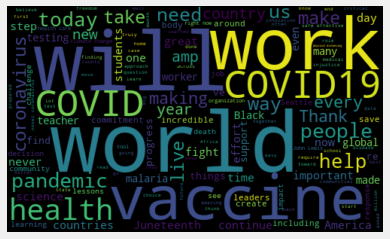

In [87]:
# word cloud visualization
allWords = ''.join([twts for twts in df["Tweets"]])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [88]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df  

,Tweets,Subjectivity,Polarity,Analysis
0,I tackle every big new problem by asking two q...,0.184848,0.045455,Positive
1,Of all the things I’ve learned from Warren Buf...,0.750000,0.450000,Positive
2,"Happy 90th birthday, Warren!",1.000000,1.000000,Positive
3,"., thank you for making the world a healthier ...",0.625000,0.400000,Positive
4,": 6 months ago, Africa confirmed its first cas...",0.666667,0.325000,Positive
...,...,...,...,...
95,There are few people I’ve learned more from ov...,0.533333,0.433333,Positive
96,I’ve been impressed by governors across the co...,0.750000,0.750000,Positive
97,Thanks to Norway and Prime Minister _solberg f...,0.400000,0.200000,Positive
98,The international response will require fundin...,0.200000,0.100000,Positive


In [89]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) I tackle every big new problem by asking two questions: Who has dealt with this problem well? And what can we learn from them?  will help to fill the gap in global health knowledge sharing and to accelerate progress in saving lives. 

2) Of all the things I’ve learned from Warren Buffett (and there have been a lot), the most important might be what friendship is all about. Here’s why he’s a person that I admire as well as like: 

3) Happy 90th birthday, Warren! 

4) ., thank you for making the world a healthier and more equitable place. Your understanding of how we can improve global prosperity, through support of organizations like , has been truly inspiring. Please now go take care of your own health.

5) : 6 months ago, Africa confirmed its first case of COVID19. Since then, there have been 1 million cases, affecting every country on…

6) If we’re going to address climate change, we need to find new ways to do things that don’t release greenhouse gases—

In [90]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

2) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

3) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

4) : “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

5) : “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

6) : Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Gener

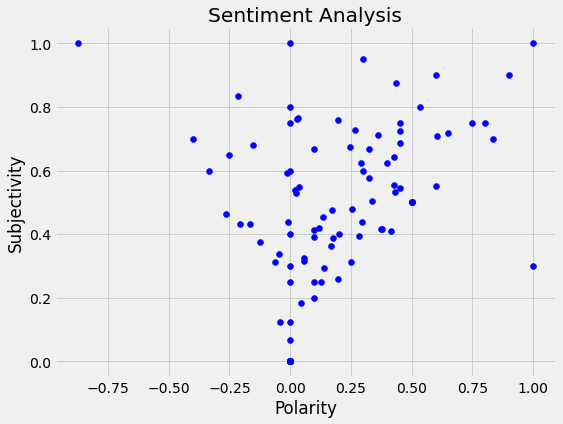

In [91]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
  
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [92]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

64.0

In [93]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

15.0

In [94]:
# Show the value counts
df['Analysis'].value_counts()

Positive    64
Neutral     21
Negative    15
Name: Analysis, dtype: int64

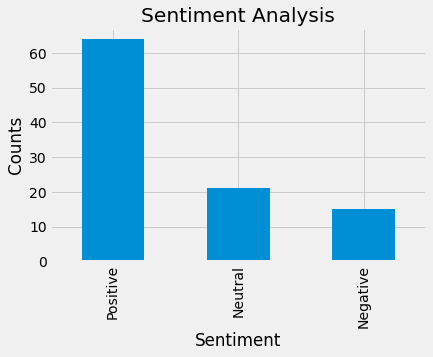

In [95]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()